# Weather Modelling Using Prophet

This example uses the Prophet model to forecast mean temperature using monthly data for Dublin Airport, Ireland. The time series ranges from November 1941 - January 2018.

#### Attributions

The below code uses the [Prophet](https://github.com/facebook/prophet) library, which has been made available by Facebook under the MIT License. Modifications have been made where appropriate for conducting analysis on the dataset specific to this example.

The copyright and permission notices are included below in accordance with the terms of the license:

Copyright (c) Facebook, Inc. and its affiliates.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

The weather data used in this example is sourced from the [Met Eireann](https://www.met.ie/climate/available-data/historical-data) website.

The below work and findings are not endorsed by the original authors in any way.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

path_to_csv = '/content/drive/MyDrive/Colab Notebooks/Statistics/data/mly532.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

dataset = pd.read_csv(path_to_csv)
dataset

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,date,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
0,1941-11-01,6.9,14.0,-3.1,9.9,3.9,67.2,-5.7,12.0,,56.1
1,1941-12-01,6.5,12.7,-3.6,9.1,3.9,41.7,-7.6,12.5,,46.1
2,1942-01-01,4.3,11.9,-3.1,6.9,1.7,91.9,-9.5,13.1,,72.8
3,1942-02-01,2.9,11.6,-4.3,5.8,0.0,25.8,-10.7,9.0,,51.4
4,1942-03-01,6.3,16.2,-6.1,9.4,3.2,76.4,-8.3,10.7,,73.9
...,...,...,...,...,...,...,...,...,...,...,...
910,2017-09-01,12.4,18.9,4.5,16.5,8.3,82.3,0.4,10.9,43,128.7
911,2017-10-01,11.2,19.5,0.8,14.8,7.7,47.8,-3.1,12.2,56,73.9
912,2017-11-01,6.5,14.1,-0.5,9.6,3.3,81.5,-2.9,10.8,36,87.0
913,2017-12-01,5.3,13.6,-4.8,8.1,2.5,63.1,-6.7,12.4,49,59.1


In [5]:
meant=dataset['meant']
meant=np.array(meant)

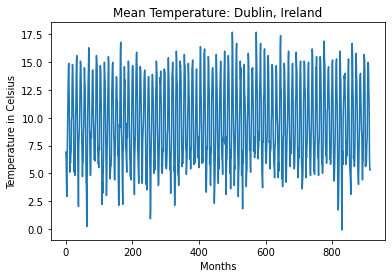

In [6]:
plt.plot(meant)
plt.title("Mean Temperature: Dublin, Ireland")
plt.xlabel("Months")
plt.ylabel("Temperature in Celsius")
plt.show()

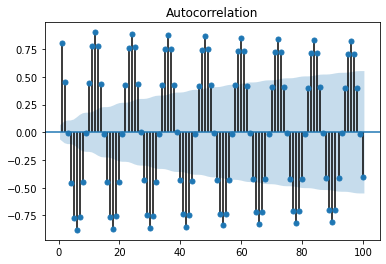

In [7]:
plot_acf(meant, lags=100, zero=False);

In [8]:
from fbprophet import Prophet
Prophet()

In [9]:
train_df=dataset[:732]
train_df

,date,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
0,1941-11-01,6.9,14.0,-3.1,9.9,3.9,67.2,-5.7,12.0,,56.1
1,1941-12-01,6.5,12.7,-3.6,9.1,3.9,41.7,-7.6,12.5,,46.1
2,1942-01-01,4.3,11.9,-3.1,6.9,1.7,91.9,-9.5,13.1,,72.8
3,1942-02-01,2.9,11.6,-4.3,5.8,0.0,25.8,-10.7,9.0,,51.4
4,1942-03-01,6.3,16.2,-6.1,9.4,3.2,76.4,-8.3,10.7,,73.9
...,...,...,...,...,...,...,...,...,...,...,...
727,2002-06-01,13.1,21.6,5.5,17.2,9.0,81.2,1.5,10.8,45,162.2
728,2002-07-01,14.4,23.7,6.7,18.3,10.4,68.9,2.1,8.3,33,106.8
729,2002-08-01,15.0,21.9,6.2,18.9,11.2,50.8,4.2,7.4,41,140.2
730,2002-09-01,12.5,20.8,3.4,17.1,8.0,22.6,-1.4,7.0,34,130.0


In [10]:
test_df=dataset[732:915]
test_df

,date,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
732,2002-11-01,8.4,15.9,1.3,11.2,5.7,185.8,-4,11.1,51,56.7
733,2002-12-01,6.4,13.4,-2.2,8.2,4.5,97.5,-5.5,11.2,48,30.6
734,2003-01-01,5.1,12.7,-4.4,8.0,2.1,62.6,-10.3,12.8,50,75.4
735,2003-02-01,4.8,12.3,-5.1,7.8,1.7,20.9,-10.7,11.2,42,102.5
736,2003-03-01,6.8,14.6,-2.3,11.6,2.1,27.1,-6.7,9.2,48,172.2
...,...,...,...,...,...,...,...,...,...,...,...
910,2017-09-01,12.4,18.9,4.5,16.5,8.3,82.3,0.4,10.9,43,128.7
911,2017-10-01,11.2,19.5,0.8,14.8,7.7,47.8,-3.1,12.2,56,73.9
912,2017-11-01,6.5,14.1,-0.5,9.6,3.3,81.5,-2.9,10.8,36,87.0
913,2017-12-01,5.3,13.6,-4.8,8.1,2.5,63.1,-6.7,12.4,49,59.1


In [11]:
train_dataset= pd.DataFrame()
train_dataset['ds'] = train_df['date']
train_dataset['y']= train_df['meant']
train_dataset.head(10)

,ds,y
0,1941-11-01,6.9
1,1941-12-01,6.5
2,1942-01-01,4.3
3,1942-02-01,2.9
4,1942-03-01,6.3
5,1942-04-01,8.4
6,1942-05-01,10.4
7,1942-06-01,13.1
8,1942-07-01,14.6
9,1942-08-01,14.9


In [12]:
from fbprophet.plot import plot_plotly

import plotly.offline as py
py.init_notebook_mode()

Output hidden; open in https://colab.research.google.com to view.

In [13]:
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
future= prophet_basic.make_future_dataframe(periods=183, freq='M')
future.tail(15)

,ds
900,2016-10-31
901,2016-11-30
902,2016-12-31
903,2017-01-31
904,2017-02-28
905,2017-03-31
906,2017-04-30
907,2017-05-31
908,2017-06-30
909,2017-07-31


In [15]:
forecast=prophet_basic.predict(future)

In [16]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1941-11-01,9.355303,5.549642,8.428725,9.355303,9.355303,-2.385299,-2.385299,-2.385299,-2.385299,-2.385299,-2.385299,0.0,0.0,0.0,6.970004
1,1941-12-01,9.355485,4.224834,6.948373,9.355485,9.355485,-3.763449,-3.763449,-3.763449,-3.763449,-3.763449,-3.763449,0.0,0.0,0.0,5.592036
2,1942-01-01,9.355673,3.419594,6.127915,9.355673,9.355673,-4.533706,-4.533706,-4.533706,-4.533706,-4.533706,-4.533706,0.0,0.0,0.0,4.821967
3,1942-02-01,9.355861,3.513393,6.315018,9.355861,9.355861,-4.407708,-4.407708,-4.407708,-4.407708,-4.407708,-4.407708,0.0,0.0,0.0,4.948152
4,1942-03-01,9.356030,4.816476,7.667635,9.356030,9.356030,-3.067655,-3.067655,-3.067655,-3.067655,-3.067655,-3.067655,0.0,0.0,0.0,6.288375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,2017-08-31,9.636280,11.577901,14.366942,9.608606,9.665734,3.334524,3.334524,3.334524,3.334524,3.334524,3.334524,0.0,0.0,0.0,12.970804
911,2017-09-30,9.636186,9.135375,11.996383,9.608371,9.665936,1.014929,1.014929,1.014929,1.014929,1.014929,1.014929,0.0,0.0,0.0,10.651116
912,2017-10-31,9.636090,5.812866,8.758677,9.608127,9.666103,-2.319113,-2.319113,-2.319113,-2.319113,-2.319113,-2.319113,0.0,0.0,0.0,7.316976
913,2017-11-30,9.635996,4.735632,7.478068,9.607801,9.666355,-3.484440,-3.484440,-3.484440,-3.484440,-3.484440,-3.484440,0.0,0.0,0.0,6.151556


In [17]:
yhat=forecast['yhat']
yhat

0       6.970004
1       5.592036
2       4.821967
3       4.948152
4       6.288375
         ...    
910    12.970804
911    10.651116
912     7.316976
913     6.151556
914     5.174282
Name: yhat, Length: 915, dtype: float64

In [18]:
yhat=yhat[732:915]

In [19]:
test=test_df['meant']
test

732     8.4
733     6.4
734     5.1
735     4.8
736     6.8
       ... 
910    12.4
911    11.2
912     6.5
913     5.3
914     5.3
Name: meant, Length: 183, dtype: float64

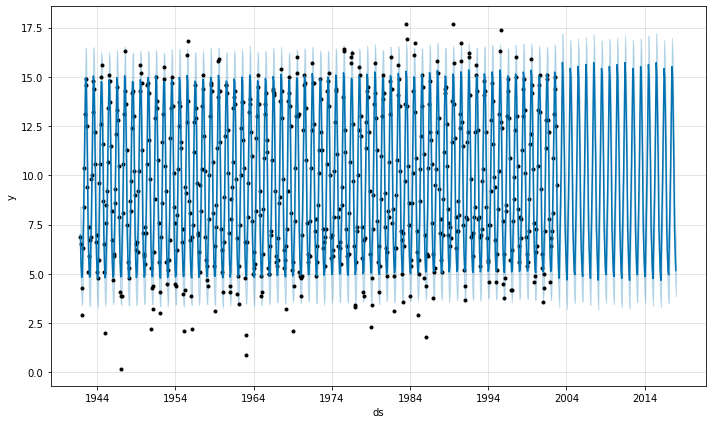

In [20]:
fig1 =prophet_basic.plot(forecast)

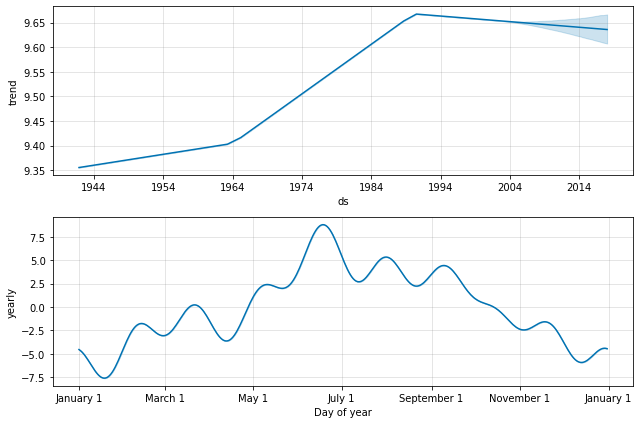

In [21]:
fig1 = prophet_basic.plot_components(forecast)

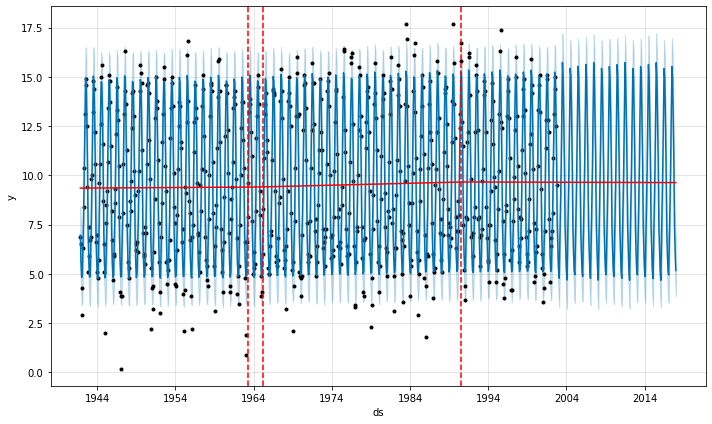

In [22]:
from fbprophet.plot import add_changepoints_to_plot
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)

In [23]:
prophet_basic.changepoints

23    1943-10-01
47    1945-10-01
70    1947-09-01
93    1949-08-01
117   1951-08-01
140   1953-07-01
164   1955-07-01
187   1957-06-01
210   1959-05-01
234   1961-05-01
257   1963-04-01
280   1965-03-01
304   1967-03-01
327   1969-02-01
350   1971-01-01
374   1973-01-01
397   1974-12-01
420   1976-11-01
444   1978-11-01
467   1980-10-01
491   1982-10-01
514   1984-09-01
537   1986-08-01
561   1988-08-01
584   1990-07-01
Name: ds, dtype: datetime64[ns]

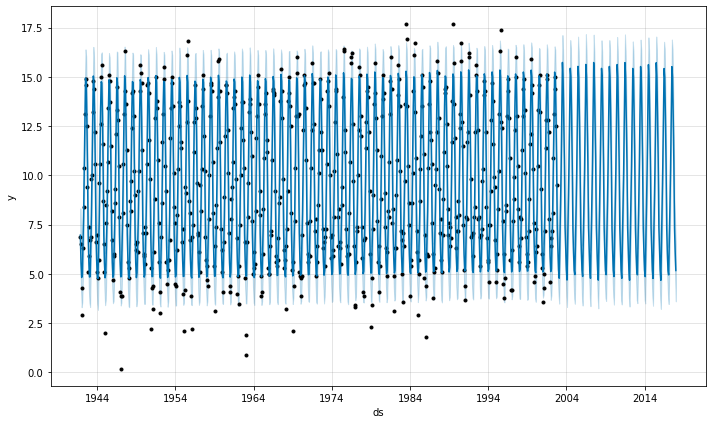

In [24]:
future_data = prophet_basic.make_future_dataframe(periods=183, freq = 'm')
 
forecast_data = prophet_basic.predict(future_data)
prophet_basic.plot(forecast_data);

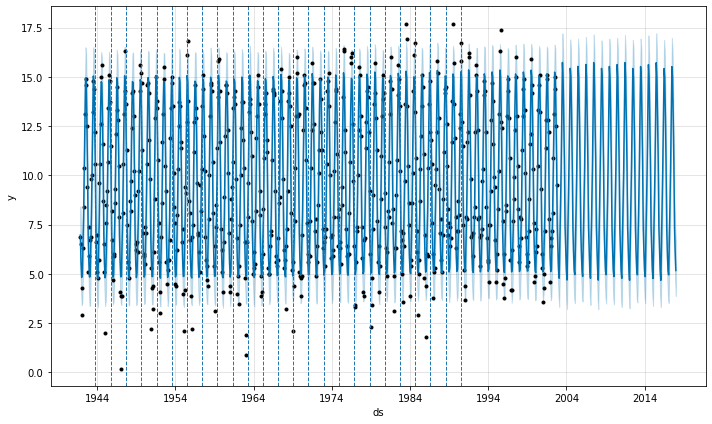

In [25]:
import matplotlib.pyplot as plt

figure = prophet_basic.plot(forecast)
for changepoint in prophet_basic.changepoints:
    plt.axvline(changepoint,ls='--', lw=1)

In [26]:
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1941-11-01,9.355303,5.552547,8.330669,9.355303,9.355303,-2.385299,-2.385299,-2.385299,-2.385299,-2.385299,-2.385299,0.0,0.0,0.0,6.970004
1,1941-12-01,9.355485,4.258234,6.936029,9.355485,9.355485,-3.763449,-3.763449,-3.763449,-3.763449,-3.763449,-3.763449,0.0,0.0,0.0,5.592036
2,1942-01-01,9.355673,3.312098,6.203323,9.355673,9.355673,-4.533706,-4.533706,-4.533706,-4.533706,-4.533706,-4.533706,0.0,0.0,0.0,4.821967
3,1942-02-01,9.355861,3.563958,6.336491,9.355861,9.355861,-4.407708,-4.407708,-4.407708,-4.407708,-4.407708,-4.407708,0.0,0.0,0.0,4.948152
4,1942-03-01,9.356030,4.825331,7.782998,9.356030,9.356030,-3.067655,-3.067655,-3.067655,-3.067655,-3.067655,-3.067655,0.0,0.0,0.0,6.288375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,2017-08-31,9.636280,11.610430,14.452525,9.610783,9.663283,3.334524,3.334524,3.334524,3.334524,3.334524,3.334524,0.0,0.0,0.0,12.970804
911,2017-09-30,9.636186,9.335381,12.131633,9.610440,9.663411,1.014929,1.014929,1.014929,1.014929,1.014929,1.014929,0.0,0.0,0.0,10.651116
912,2017-10-31,9.636090,5.850875,8.803386,9.610176,9.663628,-2.319113,-2.319113,-2.319113,-2.319113,-2.319113,-2.319113,0.0,0.0,0.0,7.316976
913,2017-11-30,9.635996,4.913556,7.614155,9.609845,9.663702,-3.484440,-3.484440,-3.484440,-3.484440,-3.484440,-3.484440,0.0,0.0,0.0,6.151556


In [27]:
yhat=forecast_data['yhat']

In [28]:
yhat

0       6.970004
1       5.592036
2       4.821967
3       4.948152
4       6.288375
         ...    
910    12.970804
911    10.651116
912     7.316976
913     6.151556
914     5.174282
Name: yhat, Length: 915, dtype: float64

In [29]:
yhat=forecast_data['yhat']
yhat_upper=forecast_data['yhat_upper']
yhat_lower=forecast_data['yhat_lower']

In [30]:
yhat=yhat[732:915]
yhat_upper=yhat_upper[732:915]
yhat_lower=yhat_lower[732:915]

In [31]:
test=test_df['meant']
test

732     8.4
733     6.4
734     5.1
735     4.8
736     6.8
       ... 
910    12.4
911    11.2
912     6.5
913     5.3
914     5.3
Name: meant, Length: 183, dtype: float64

In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(test, yhat)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 1.149431


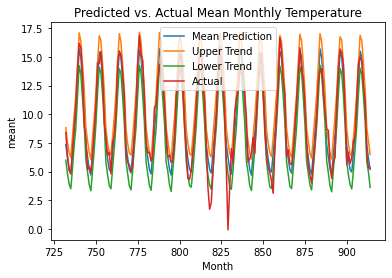

In [33]:
import matplotlib.pyplot as plt

predictons, =plt.plot(yhat, label='Mean Prediction')
upper, =plt.plot(yhat_upper, label='Upper Trend')
lower, =plt.plot(yhat_lower, label='Lower Trend')
actual, =plt.plot(test, label='Actual')
plt.xlabel('Month')
plt.ylabel('meant')
plt.title("Predicted vs. Actual Mean Monthly Temperature")
plt.legend(loc = 'upper center')
plt.show()

In [34]:
np.mean(test)

9.559562841530056